In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
from matplotlib import cm
import matplotlib.lines as mlines
from mpl_toolkits.mplot3d import Axes3D


In [3]:

# """
# Author: Kelsey D'Souza
# visualize_scatter
# 	Assumes binary labels and creates a line between the data using the given 
# 	feature and bias weights. 
# 	Note: weights should be input as [w1, w2, bias]

# visualize_3d
# 	Plots data points in 3D space using feat1 x feat2 on the x-y base, and 
# 	label as the data point height along the z-axis.
# 	It then creates a 3D surface plot of the continuous label model using
# 	the given linear regressor weights.

# """


In [48]:

def visualize_scatter(df, feat1=0, feat2=1, labels=2, weights=[-1, -1, 1],
                      title=''):
    """
        Scatter plot feat1 vs feat2.
        Assumes +/- binary labels.
        Plots first and second columns by default.
        Args:
          - df: dataframe with feat1, feat2, and labels
          - feat1: column name of first feature
          - feat2: column name of second feature
          - labels: column name of labels
          - weights: [w1, w2, b] 
    """

    # Draw color-coded scatter plot
    colors = pd.Series(['b' if label > 0 else 'r' for label in df[labels]])
    ax = df.plot(x=feat1, y=feat2, kind='scatter', c=colors)

    # Get scatter plot boundaries to define line boundaries
    xmin, xmax = ax.get_xlim()

    # Compute and draw line. ax + by + c = 0  =>  y = -a/b*x - c/b
    a = weights[0]
    b = weights[1]
    c = weights[2]

    def y(x):
        return (-a/b)*x - c/b

    line_start = (xmin, xmax)
    line_end = (y(xmin), y(xmax))
    line = mlines.Line2D(line_start, line_end, color='black')
    ax.add_line(line)


    if title == '':
        title = 'Scatter of feature %s vs %s' %(str(feat1), str(feat2))
    ax.set_title(title)
    ax.set_xlabel('')
    ax.set_ylabel('')

    plt.show()



In [23]:

def visualize_3d(df, lin_reg_weights=[1,1,1], feat1=0, feat2=1, labels=2,
                 xlim=(-1, 1), ylim=(-1, 1), zlim=(0, 3),
                 alpha=0., xlabel='age', ylabel='weight', zlabel='height',
                 title=''):
    """ 
    3D surface plot. 
    Main args:
      - df: dataframe with feat1, feat2, and labels
      - feat1: int/string column name of first feature
      - feat2: int/string column name of second feature
      - labels: int/string column name of labels
      - lin_reg_weights: [b_0, b_1 , b_2] list of float weights in order
    Optional args:
      - x,y,zlim: axes boundaries. Default to -1 to 1 normalized feature values.
      - alpha: step size of this model, for title only
      - x,y,z labels: for display only
      - title: title of plot
    """

    # Setup 3D figure
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    # plt.hold(True)

    # Add scatter plot
    ax.scatter(df[feat1], df[feat2], df[labels])

    # Set axes spacings for age, weight, height
    axes1 = np.arange(xlim[0], xlim[1], step=.05)  # age
    axes2 = np.arange(xlim[0], ylim[1], step=.05)  # weight
    axes1, axes2 = np.meshgrid(axes1, axes2)
    axes3 = np.array( [lin_reg_weights[0] +
                       lin_reg_weights[1]*f1 +
                       lin_reg_weights[2]*f2  # height
                       for f1, f2 in zip(axes1, axes2)] )
    plane = ax.plot_surface(axes1, axes2, axes3, cmap=cm.Spectral,
                            antialiased=False, rstride=1, cstride=1)

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)
    ax.set_xlim3d(xlim)
    ax.set_ylim3d(ylim)
    ax.set_zlim3d(zlim)

    if title == '':
        title = 'LinReg Height with Alpha %f' % alpha
    ax.set_title(title)

    # for ii in np.arange(0, 360, 1):
    #   ax.view_init(elev=32, azim=ii)
    #   fig.savefig('./gif/gif_image%d.png' % ii)

    plt.show()



Visualizing input1.csv


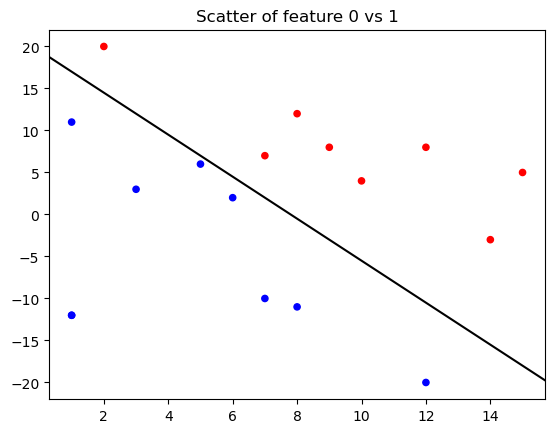

Generating default sample plots.


In [52]:

# if __name__ == "__main__":

#======== INPUT1.CSV =======#
print("Visualizing input1.csv")

# Import input1.csv, without headers for easier indexing
data = pd.read_csv('data1.csv', header=None)

# Note, these weights just happen to look good.
visualize_scatter(data, weights=[-5, -2, 39.0])

# ======== SAMPLE PLOTS =======#
print('Generating default sample plots.')


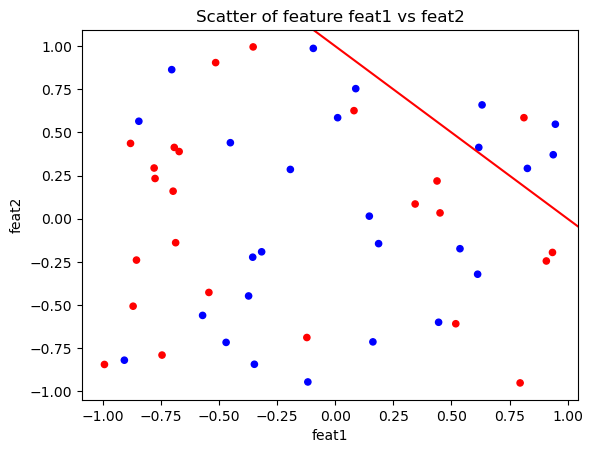

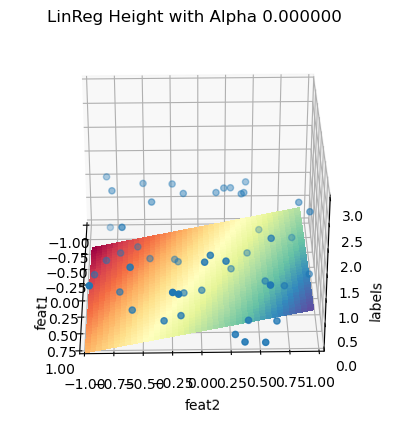

In [24]:

# Example random data
data = {'feat1': np.random.uniform(-1, 1, 50),
        'feat2': np.random.uniform(-1, 1, 50),
        'labels': np.random.rand(50) > 0.5}
df = pd.DataFrame(data)

# Sample scatter plot
visualize_scatter(df, feat1='feat1', feat2='feat2', labels='labels')

# Sample meshgrid using arbitrary linreg weights
col_names = list(df)
bias = np.random.rand() * 0.1
w1 = np.random.rand()
w2 = np.random.rand()
lin_reg_weights = [bias, w1, w2]

visualize_3d(df, lin_reg_weights=lin_reg_weights,
                feat1='feat1', feat2='feat2', labels='labels',
                xlabel=col_names[0], ylabel=col_names[1], zlabel=col_names[2])

